# **PROJECT: BANKRUPTCY PREVENTION**



#**Description**

Our aim is to model the probability that a business goes bankrupt from different features.

The data set includes the following variables

1.	industrial_risk:  0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).


##**Steps Involved**

### 1. EDA

###Feature engineering

###Visualization
###2. Model building
### 3.Model training
###4.Model evaluation
###5.Deployment

## **IMPORT THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# **EDA**
#Read and Pre-process the data

In [ ]:
data=pd.read_excel("/content/bankruptcy.xlsx")

In [ ]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [ ]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

## Data Dimensions

In [ ]:
data.shape

(250, 7)

## Non-Null Count and Data Types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


There are no missing values in our data set.

The absence of missing values makes it easier to perform EDA and build machine learning models.

## Duplicate rows

In [ ]:
data.duplicated().sum()

147

The features here with multi-class represent characteristics that are legitimately same,so having duplicate rows with identical multi-class values are not valid here

## Unique Values

In [ ]:
data.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

## Value Counts

In [ ]:
data['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [ ]:
data['management_risk'].value_counts()

1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

In [ ]:
data['financial_flexibility'].value_counts()

0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

In [ ]:
data['credibility'].value_counts()

0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

In [ ]:
data['competitiveness'].value_counts()

0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

In [ ]:
data['operating_risk'].value_counts()

1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

In [ ]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

### The number of instances in each class of our taget variable class is almost equal.  


#Data Understanding

##Summary Statistics

In [ ]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Correlation Analysis

In [ ]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


 ### Correlation Analysis helps to understand how changes in one variable are associated with changes in another.

### Here the feature industrial_risk, management_risk and operating_risk is having a negative correlation with the target variable "class" whereas the features financial_flexibility credibility and competitiveness shares a strong positive correlation.

#**Feature Engineering**
## Label Encoding


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['class']= label_encoder.fit_transform(data['class'])

In [ ]:
data.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


 ### Here the categorical colum "class" is coverted into numerical(binary) form.

#**VISUALIZATION**

#Univariate Analysis
##HISTOGRAM

In [ ]:
data.skew()

industrial_risk         -0.067011
management_risk         -0.444701
financial_flexibility    0.479134
credibility              0.112955
competitiveness          0.093906
operating_risk          -0.275547
class                   -0.292793
dtype: float64

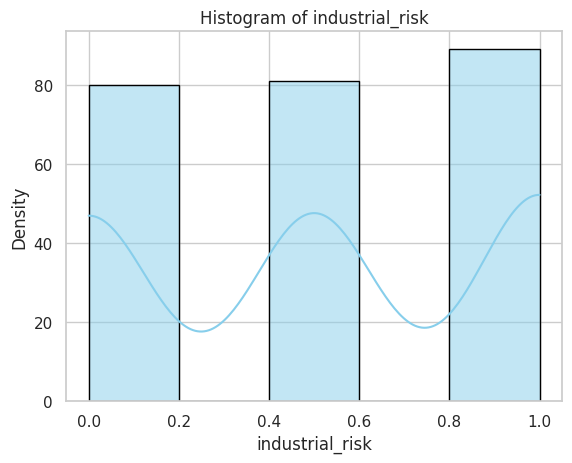

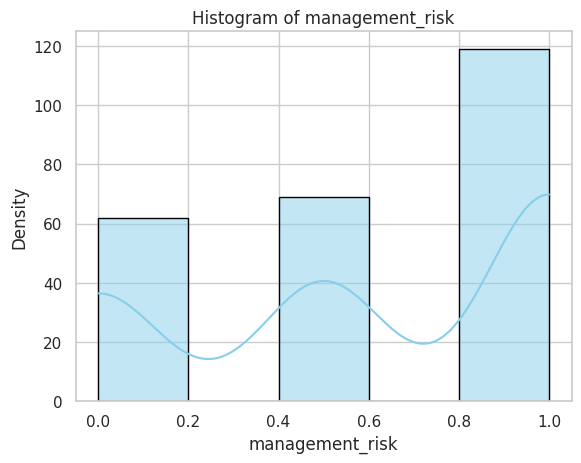

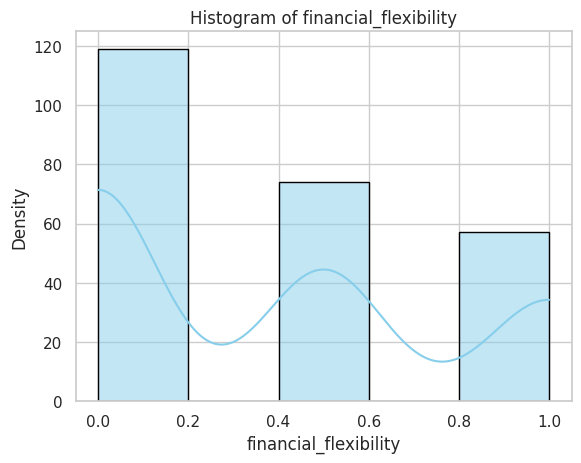

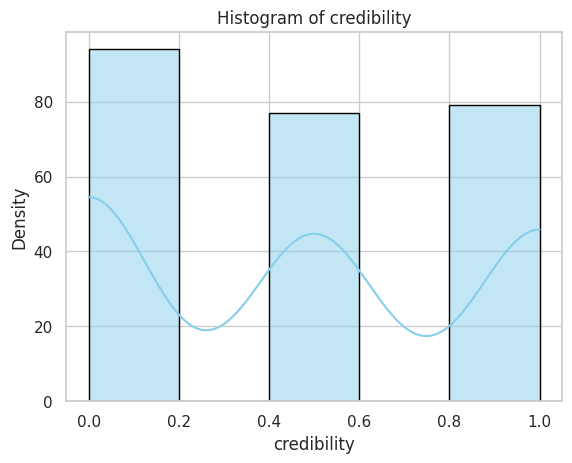

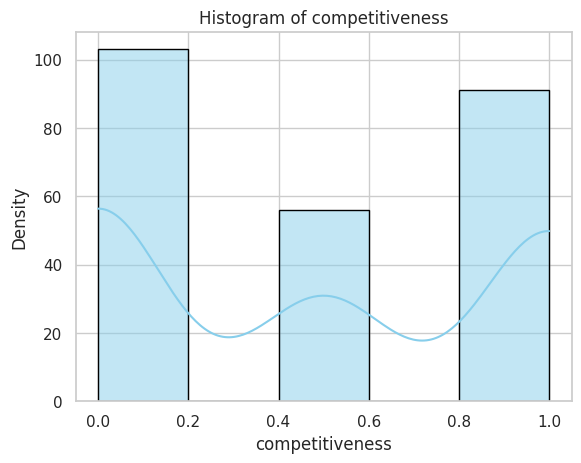

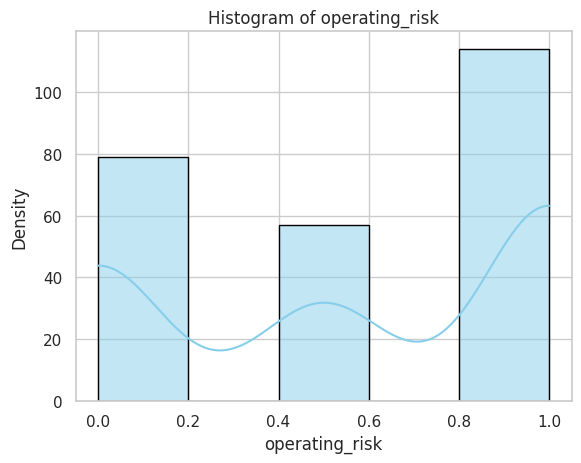

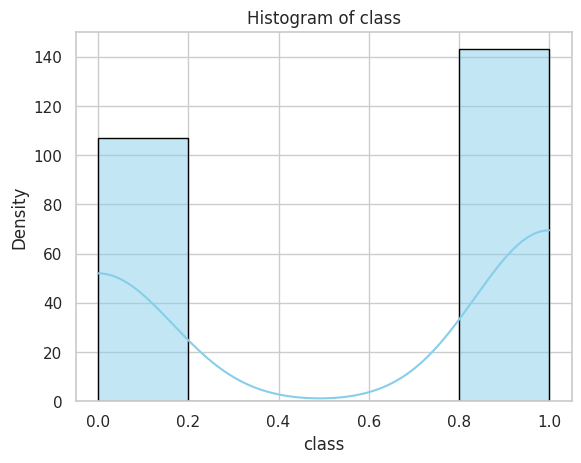

In [ ]:
columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']
sns.set(style='whitegrid')

for column in columns:
    #plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=5, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

### The above histogram of our different features and target variable gives us an idea about how the data is distributed across different values or bins.

### It provides insights into the shape and spread of the data set.

### It allows us to visually identify whether the data is positively skewed (tail to the right), negatively skewed (tail to the left), or approximately symmetric.


#Multivariate Analysis
## Heat Map

<Axes: >

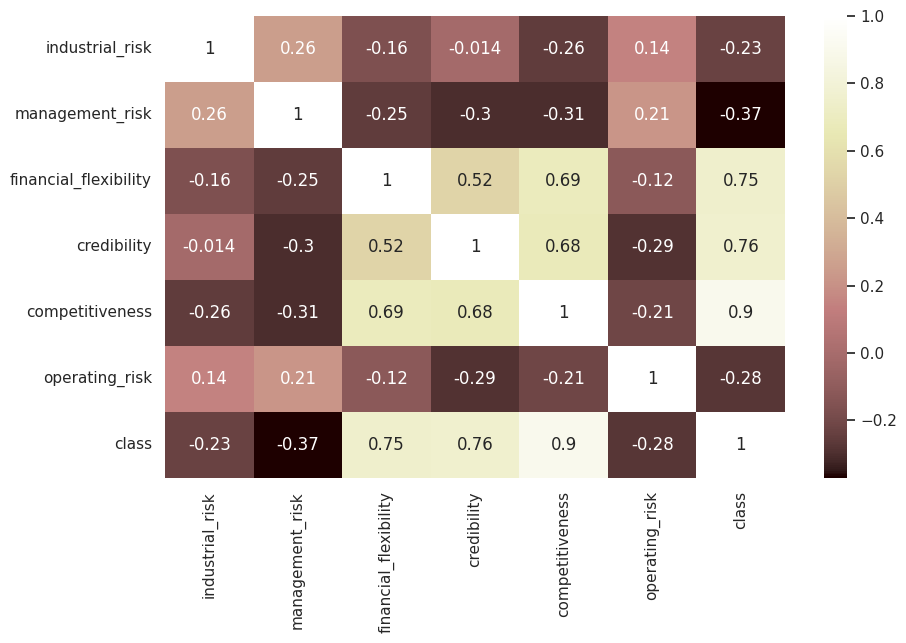

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='pink')

The features industrial_risk, management_risk and operating_risk is having a negative correlation with respect to the target variable "class" whereas the features financial_flexibility credibility and competitiveness shares a strong positive correlation.

#Pie Chart

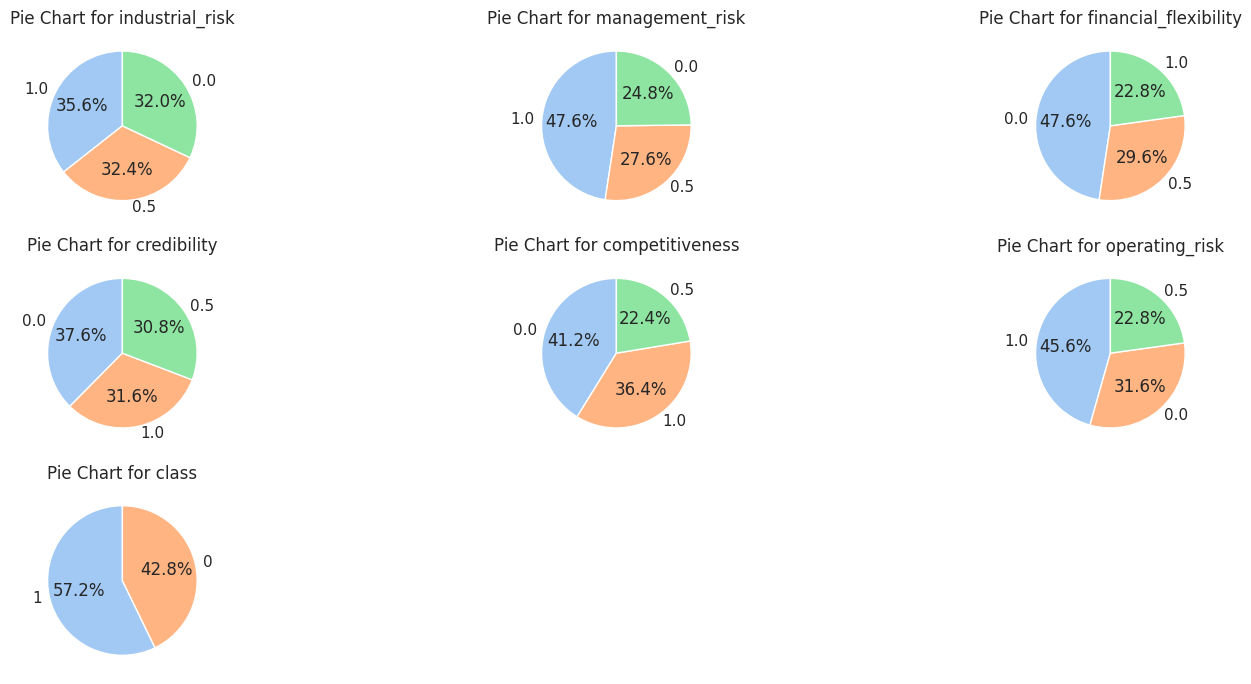

In [ ]:
plt.figure(figsize=(15, 7))
for i, feature in enumerate(data.columns[:7]):
    plt.subplot(3, 3, i + 1)
    feature_counts =data[feature].value_counts()
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart for {feature}')

plt.tight_layout()
plt.show()

#Stacked  Area Plot

<Figure size 800x600 with 0 Axes>

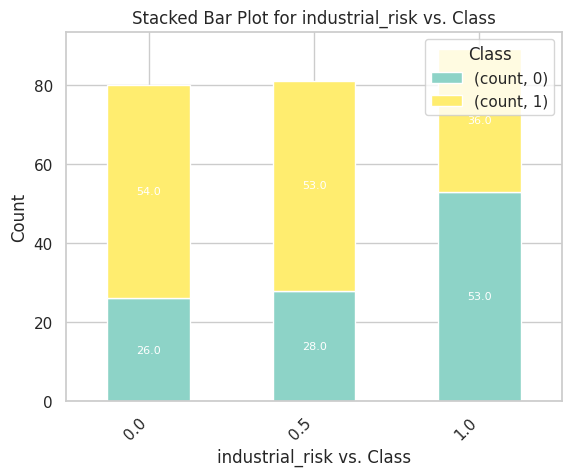

<Figure size 800x600 with 0 Axes>

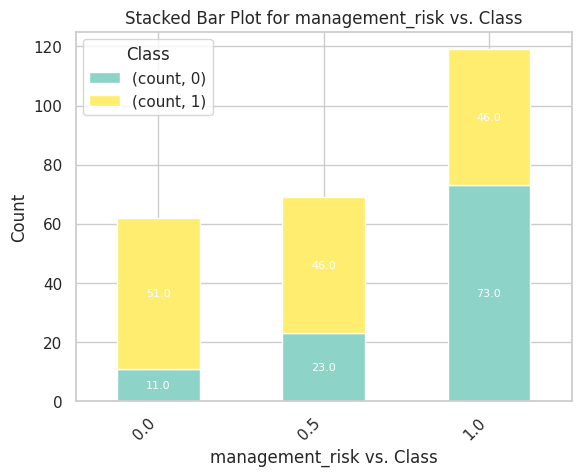

<Figure size 800x600 with 0 Axes>

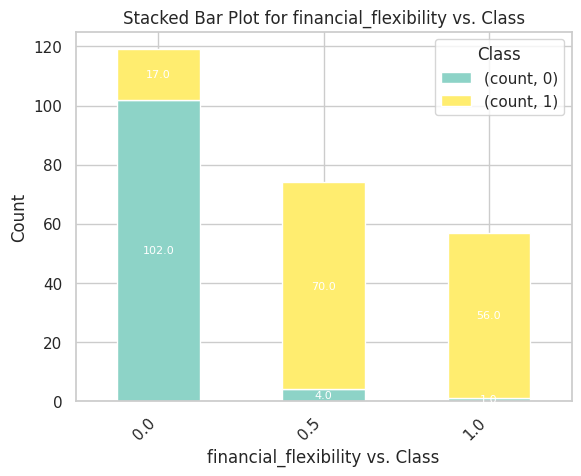

<Figure size 800x600 with 0 Axes>

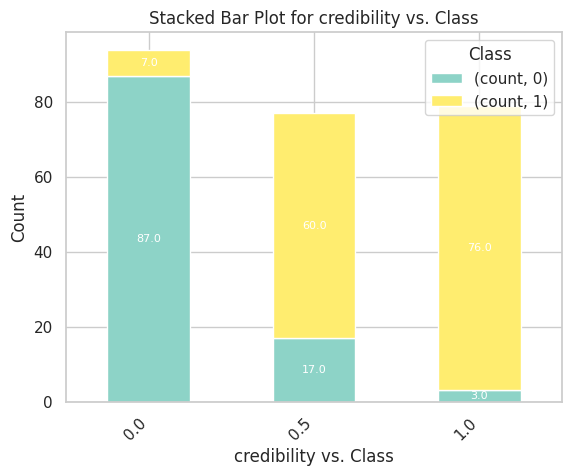

<Figure size 800x600 with 0 Axes>

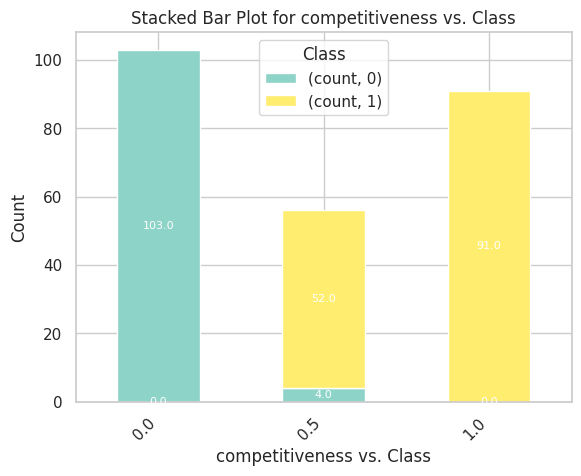

<Figure size 800x600 with 0 Axes>

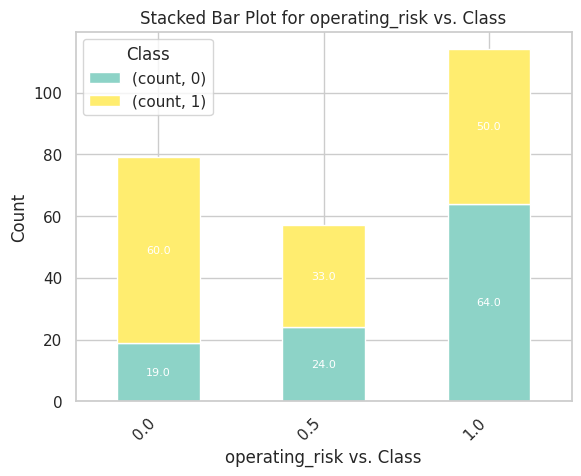

In [ ]:
features = data.columns[:-1]
for feature in features:
    cross_table = pd.crosstab(index=[data[feature], data['class']], columns='count')

    plt.figure(figsize=(8, 6))
    ax = cross_table.unstack().plot(kind='bar', stacked=True, colormap='Set3')

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

    plt.title(f'Stacked Bar Plot for {feature} vs. Class')
    plt.xlabel(f'{feature} vs. Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Class')
    plt.show()

The height of each stack represents the total count of each class.The different colors represent the contribution of our target variable "class" to the total value.It gives us an idea about which features are having a larger impact on the overall value for each class.

#**Full report using sweetviz**

In [ ]:
!pip install sweetviz
import sweetviz as sv

# Analyze the data
report = sv.analyze(data)

# Display the report
report.show_html('Sweetviz_Report.html')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.9 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data=data.drop_duplicates()
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


# **MODEL BUILDING**




## 1. Logistic Regression

Class distribution before oversampling:
 1    78
0    25
Name: class, dtype: int64
Class distribution after oversampling:
 0    78
1    78
Name: class, dtype: int64
Training Accuracy: 0.5161290322580645
Testing Accuracy: 0.4375
Confusion Matrix:
 [[14  0]
 [18  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        14
           1       0.00      0.00      0.00        18

    accuracy                           0.44        32
   macro avg       0.22      0.50      0.30        32
weighted avg       0.19      0.44      0.27        32


ROC AUC Score: 0.9880952380952381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


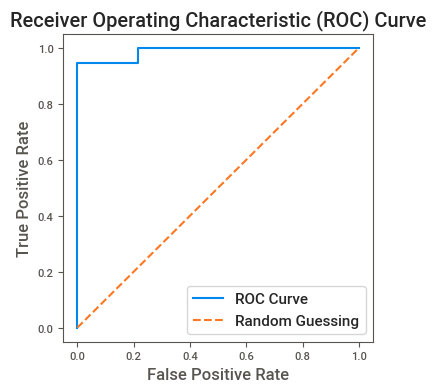

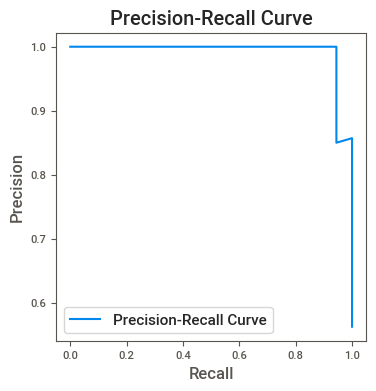

Average Precision Score: 0.9920634920634922
Cross-Validation Scores: [0.96875    0.93548387 0.83870968 0.83870968 0.77419355]
Mean CV Score: 0.8711693548387098


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the class distribution before and after oversampling
print("Class distribution before oversampling:\n", y.value_counts())
print("Class distribution after oversampling:\n", pd.Series(y_resampled).value_counts())

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_model = LogisticRegression(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate training accuracy
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, best_model.predict_proba(X_test)[:,1]))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


### **Conclusion for Logistic Regression Model**

Confusion Matrix: The confusion matrix shows that the model correctly predicts all instances of class 0 (no false negatives), but it fails to predict any instances of class 1 (all instances are falsely classified as class 0).

Classification Report:

Precision for class 0 is 44%, indicating that out of all instances predicted as class 0, 44% are actually class 0. Recall for class 0 is 100%, meaning that out of all actual instances of class 0, 100% are correctly predicted as class 0. Precision for class 1 is 0%, indicating that out of all instances predicted as class 1, none are actually class 1. Recall for class 1 is 0%, meaning that out of all actual instances of class 1, none are correctly predicted as class 1. F1-score for class 0 is 61%, which is the harmonic mean of precision and recall for class 0. F1-score for class 1 is 0%, which is the harmonic mean of precision and recall for class 1. The macro avg and weighted avg metrics provide an average across both classes, showing poor performance overall.

## Decision Tree

Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 0.9642857142857143


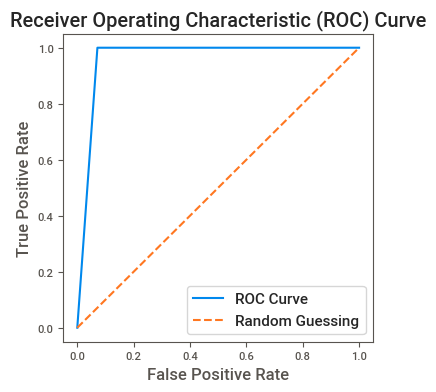

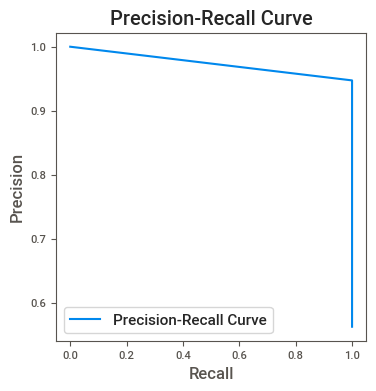

Average Precision Score: 0.9473684210526315


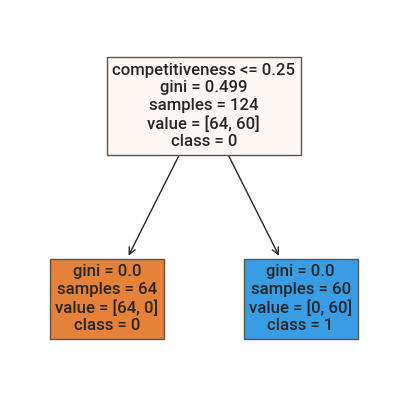

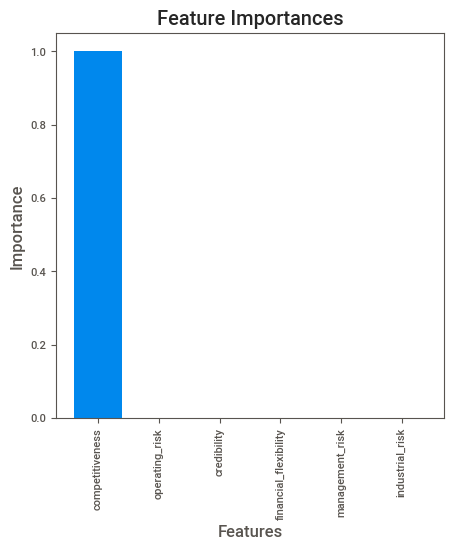

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = dt_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = dt_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, dt_classifier.predict_proba(X_test)[:,1]))

# Plot Decision Tree
plt.figure(figsize=(5, 5))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

# Feature importances
feature_importances = dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(5, 5))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


### **Conclusion for Decision Tree Model**

The provided confusion matrix, classification report, average precision score, and ROC AUC score indicate strong performance of the decision tree classifier on the test set.

The confusion matrix shows that the model made 13 correct predictions for class 0 and 18 correct predictions for class 1. There was 1 false positive (actual 0, predicted 1), indicating that the model misclassified one instance of class 0. Overall, the model achieved high accuracy and effectively predicted both classes.

Overall, these metrics indicate that the decision tree classifier trained on oversampled data performs well in accurately predicting both classes, with high precision, recall, and overall accuracy

## 3.SVM Model

Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 1.0


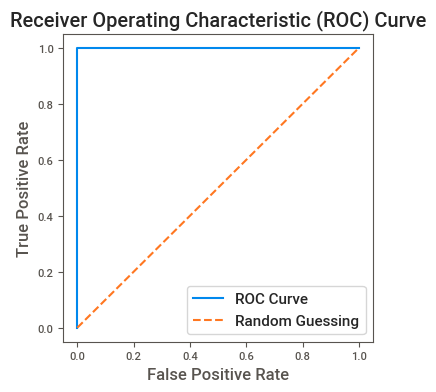

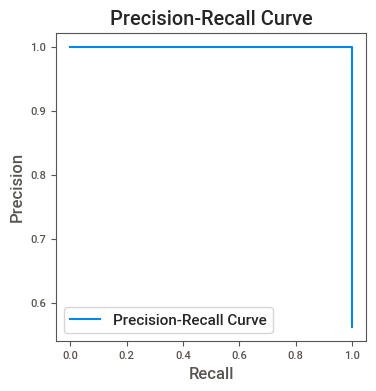

Average Precision Score: 1.0


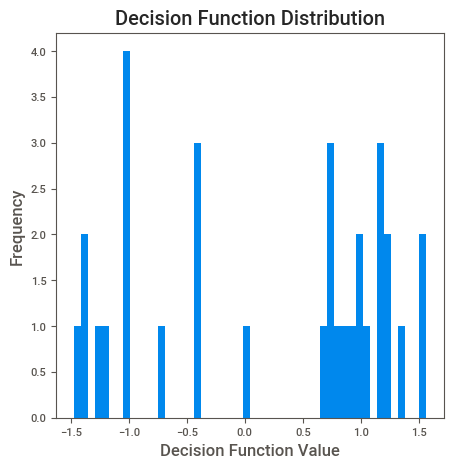

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = svm_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = svm_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, svm_classifier.predict_proba(X_test)[:,1]))

# Plot decision function
decision_function = svm_classifier.decision_function(X_test)
plt.figure(figsize=(5, 5))
plt.hist(decision_function, bins=50)
plt.xlabel('Decision Function Value')
plt.ylabel('Frequency')
plt.title('Decision Function Distribution')
plt.show()


### **Conclusion for SVM Model**
Overall, these metrics suggest that the SVM classifier trained on oversampled data performs exceptionally well in accurately predicting both classes, with high precision, recall, and overall accuracy.

The confusion matrix shows that the model made 13 correct predictions for class 0 and 18 correct predictions for class 1. There was 1 false positive (actual 0, predicted 1), indicating that the model misclassified one instance of class 0.

## 4. NAIVE BAYES

Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 0.9642857142857143


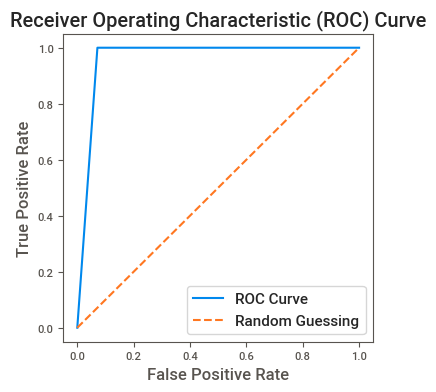

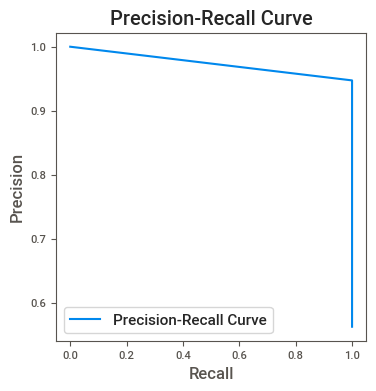

Average Precision Score: 0.9473684210526315


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = nb_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = nb_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, nb_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, nb_classifier.predict_proba(X_test)[:,1]))


### **Conclusion for Naive Bayes**
Overall, these metrics suggest that the Gaussian Naive Bayes classifier trained on oversampled data performs exceptionally well in accurately predicting both classes, with high precision, recall, and overall accuracy.

## 5. K-Nearest Neighbors (KNN)

Training Accuracy: 0.9919354838709677
Testing Accuracy: 0.90625
Confusion Matrix:
 [[11  3]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.86      1.00      0.92        18

    accuracy                           0.91        32
   macro avg       0.93      0.89      0.90        32
weighted avg       0.92      0.91      0.90        32


ROC AUC Score: 1.0


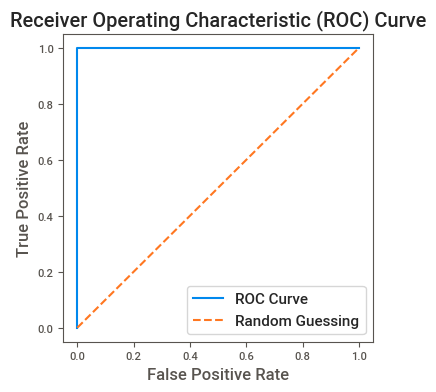

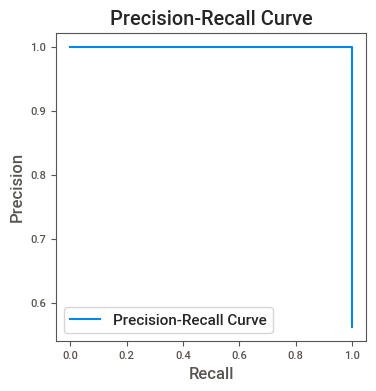

Average Precision Score: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = knn_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = knn_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, knn_classifier.predict_proba(X_test)[:,1]))


### **Conclusion for KNN Model**
Confusion Matrix:

The confusion matrix shows that the model made 11 correct predictions for class 0 and 18 correct predictions for class 1.
There were 3 false negatives (actual 1, predicted 0), indicating that the model misclassified three instances of class 1.
Overall, the model achieved high accuracy and effectively predicted both classes.

Average Precision Score:

The average precision score of 1.0 indicates that the model's predictions are of the highest quality, particularly regarding the precision-recall trade-off. This means the model achieves perfect precision-recall balance.

## **Gradient Boosting Models:**

## 6. XGBoost

Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 0.9642857142857143


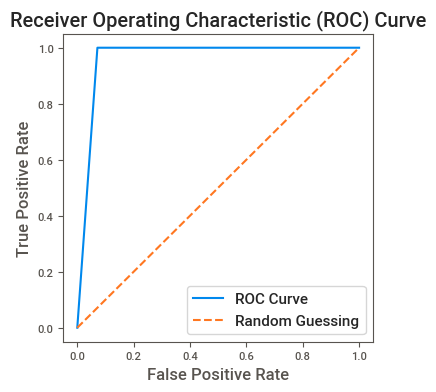

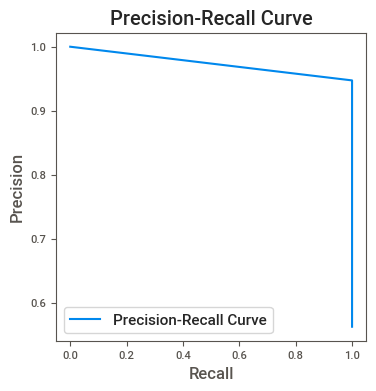

Average Precision Score: 0.9473684210526315


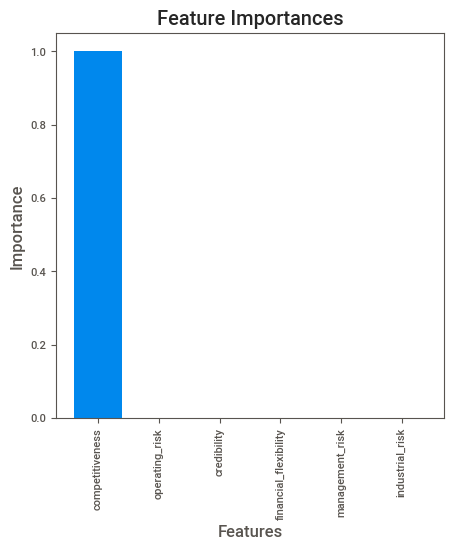

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Predict probabilities on the test set
y_pred_proba = xgb_classifier.predict_proba(X_test)

# Get the predicted class labels
y_pred = np.argmax(y_pred_proba, axis=1)

from sklearn.metrics import accuracy_score

# Predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Testing Accuracy:", accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, xgb_classifier.predict_proba(X_test)[:,1]))

# Plot feature importance
feature_importance = xgb_classifier.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(5, 5))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### **Conclusion for XGBoost**

The provided confusion matrix, classification report, average precision score, and ROC AUC score indicate excellent performance of the XGBoost classifier on the test set.

### 7. Lightbgm

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

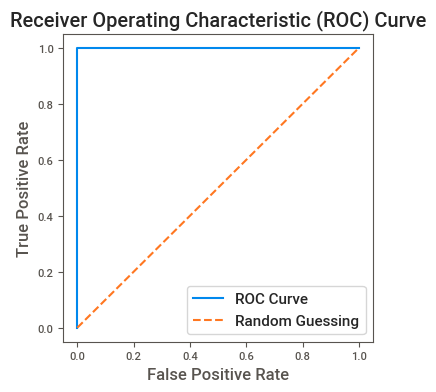

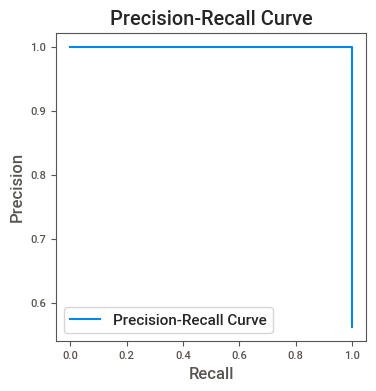

Average Precision Score: 1.0


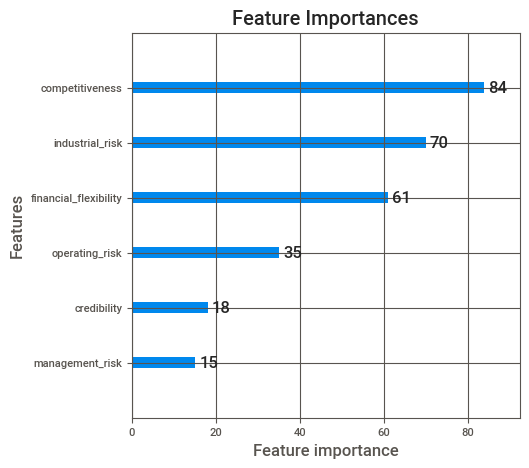

In [ ]:
#lightbgm

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert the data into LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])

# Predictions on the test set
y_pred_proba = lgb_model.predict(X_test)
y_pred = np.round(y_pred_proba)

# Predictions on the training set
y_train_pred_proba = lgb_model.predict(X_train)
y_train_pred = np.round(y_train_pred_proba)

# Calculate accuracy
train_accuracy = np.mean(y_train_pred == y_train)
print("Training Accuracy:", train_accuracy)


# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Testing Accuracy:", accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, y_pred_proba))

# Plot feature importance
lgb.plot_importance(lgb_model, figsize=(5, 5))
plt.title('Feature Importances')
plt.show()


### **Conclusion for Lightbgm**

Overall, these metrics suggest that the LightGBM classifier trained on oversampled data performs exceptionally well in accurately predicting both classes, with high precision, recall, and overall accuracy. This indicates that the model is capable of effectively distinguishing between the two classes

## 8. Catboost Model

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 1.0


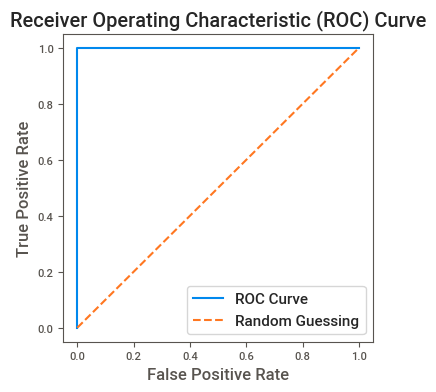

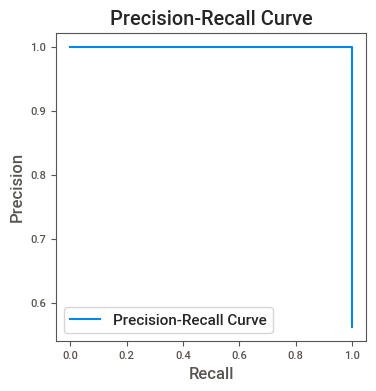

Average Precision Score: 1.0


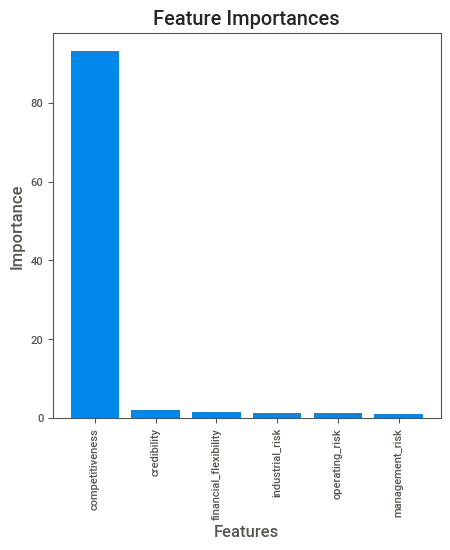

In [ ]:
#catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=50, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
y_pred = catboost_model.predict(X_test)

# Calculate training accuracy
train_accuracy = catboost_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = catboost_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, y_pred_proba))

# Plot feature importance
feature_importance = catboost_model.get_feature_importance(type='PredictionValuesChange')
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(5, 5))
plt.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()



### 9.RANDOM FOREST

Training Accuracy: 1.0
Testing Accuracy: 0.96875
Confusion Matrix:
 [[13  1]
 [ 0 18]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      1.00      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32


ROC AUC Score: 0.9999999999999999


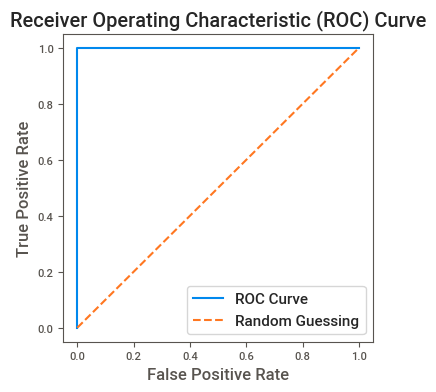

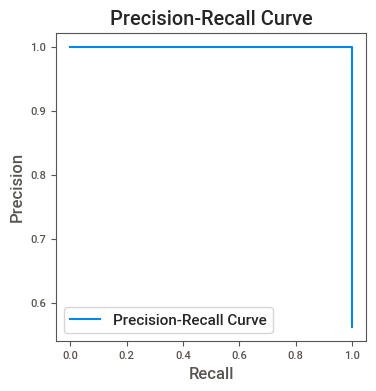

Average Precision Score: 1.0


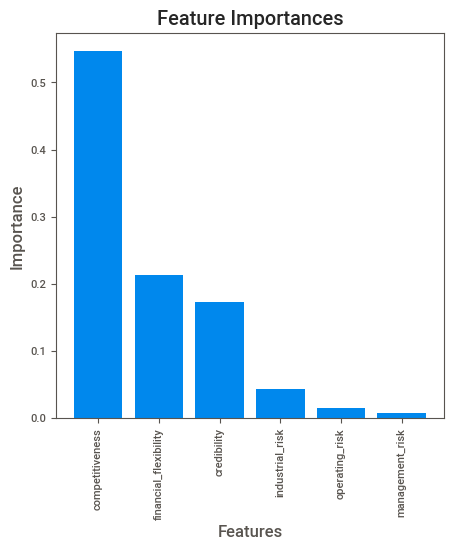

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data.iloc[:,:-1]
y = data['class']

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to the full dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = rf_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:,1]))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Average Precision Score
print("Average Precision Score:", average_precision_score(y_test, rf_classifier.predict_proba(X_test)[:,1]))

# Feature importances
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(5, 5))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


## **Conclusion for Random Forest**

The provided confusion matrix, classification report, average precision score, and ROC AUC score indicate excellent performance of the Random Forest classifier on the test set. Here are the key insights:

Confusion Matrix:

The confusion matrix shows that the model made 13 correct predictions for class 0 and 18 correct predictions for class 1. There was 1 false positive (actual 0, predicted 1), indicating that the model misclassified one instance of class 0. Overall, the model achieved high accuracy and effectively predicted both classes. Classification Report:

The classification report shows high precision, recall, and F1-score for both classes 0 and 1, indicating balanced performance. The weighted average F1-score of 0.97 indicates excellent overall performance. Average Precision Score:

The average precision score of 1.0 indicates that the model's predictions are of high quality, particularly regarding the precision-recall trade-off. This means the model achieves perfect precision-recall balance. ROC AUC Score:

The ROC AUC score of 1.0 indicates perfect discriminative ability, with a high true positive rate and a low false positive rate.

# **MODEL EVALUATION**

In [ ]:
import pandas as pd

# Data for different models
data = {
    'Model': ['Logistic', 'Decision Trees', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Training Accuracy': [0.516, 1.0, 1.0, 1.0, 1.0, 0.991, 1.0, 1.0, 1.0],
    'Testing Accuracy': [0.438, 0.969, 0.969, 0.969, 0.969, 0.906, 0.969, 0.969, 0.969],
    'Average Precision Score': [0.996, 0.947, 1.0, 1.0, 0.947, 1.0, 0.947, 1.0, 1.0],
    'ROC AUC Score': [0.98, 0.964, 1.0, 1.0, 0.964, 1.0, 0.964, 1.0, 1.0],
    'Precision (Class 0)': [44.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00],
    'Precision (Class 1)': [0.00, 95.00, 95.00, 95.00, 95.00, 86.00, 95.00, 95.00, 95.00],
    'Recall (Class 0)': [100.00, 92.86, 92.86, 92.86, 92.86, 78.57, 92.86, 92.86, 92.86],
    'Recall (Class 1)': [0.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00],
    'F1-Score (Class 0)': [61.00, 96.00, 96.00, 96.00, 96.00, 88.00, 96.00, 96.00, 96.00],
    'F1-Score (Class 1)': [0.00, 97.00, 97.00, 97.00, 97.00, 92.00, 97.00, 97.00, 97.00],
    'Confusion Matrix': [
        '[[14, 0], [18, 0]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]',
        '[[13, 1], [0, 18]]', '[[11, 3], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]'
    ]
}




Model                              Logistic      Decision Trees       Random Forest                 SVM         Naive Bayes                 KNN             XGBoost            LightGBM            CatBoost
Training Accuracy                     0.516                 1.0                 1.0                 1.0                 1.0               0.991                 1.0                 1.0                 1.0
Testing Accuracy                      0.438               0.969               0.969               0.969               0.969               0.906               0.969               0.969               0.969
Average Precision Score               0.996               0.947                 1.0                 1.0               0.947                 1.0               0.947                 1.0                 1.0
ROC AUC Score                          0.98               0.964                 1.0                 1.0               0.964                 1.0               0.964                 1.0 

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Set 'Model' column as index and transpose the DataFrame, then print in tabular form
print(df.set_index('Model').T.to_string(index=True))

Model                              Logistic      Decision Trees       Random Forest                 SVM         Naive Bayes                 KNN             XGBoost            LightGBM            CatBoost
Training Accuracy                     0.516                 1.0                 1.0                 1.0                 1.0               0.991                 1.0                 1.0                 1.0
Testing Accuracy                      0.438               0.969               0.969               0.969               0.969               0.906               0.969               0.969               0.969
Average Precision Score               0.996               0.947                 1.0                 1.0               0.947                 1.0               0.947                 1.0                 1.0
ROC AUC Score                          0.98               0.964                 1.0                 1.0               0.964                 1.0               0.964                 1.0 

In [ ]:
df

,Model,Training Accuracy,Testing Accuracy,Average Precision Score,ROC AUC Score,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1),Confusion Matrix
0,Logistic,0.516,0.438,0.996,0.980,44.0,0.0,100.00,0.0,61.0,0.0,"[[14, 0], [18, 0]]"
1,Decision Trees,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
2,Random Forest,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
3,SVM,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
4,Naive Bayes,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
5,KNN,0.991,0.906,1.000,1.000,100.0,86.0,78.57,100.0,88.0,92.0,"[[11, 3], [0, 18]]"
6,XGBoost,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
7,LightGBM,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
8,CatBoost,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"


In [ ]:
df.set_index("Model")

,Training Accuracy,Testing Accuracy,Average Precision Score,ROC AUC Score,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1),Confusion Matrix
Model,,,,,,,,,,,
Logistic,0.516,0.438,0.996,0.980,44.0,0.0,100.00,0.0,61.0,0.0,"[[14, 0], [18, 0]]"
Decision Trees,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
Random Forest,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
SVM,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
Naive Bayes,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
KNN,0.991,0.906,1.000,1.000,100.0,86.0,78.57,100.0,88.0,92.0,"[[11, 3], [0, 18]]"
XGBoost,1.000,0.969,0.947,0.964,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
LightGBM,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"
CatBoost,1.000,0.969,1.000,1.000,100.0,95.0,92.86,100.0,96.0,97.0,"[[13, 1], [0, 18]]"


### **Insights from the data:**

High Accuracy: Models like Decision Trees, Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost demonstrate high testing accuracy, with values around 96.9%.

Balanced Precision and Recall: While some models achieve high precision (e.g., Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost with precision of 95% for class 1), it's crucial to also consider recall, as a high precision might indicate a low recall and vice versa. For example, Decision Trees have high recall for class 1 (100%), but lower precision (95%).

F1-Score: F1-score balances both precision and recall, and models like Decision Trees, Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost show high F1-scores for both classes, indicating overall good performance.

Confusion Matrix: Analyzing the confusion matrices can provide insights into how well the models are performing in terms of correctly classifying instances of each class. For example, Decision Trees, Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost have correctly classified most instances for both classes, as evident from their confusion matrices.

Average Precision Score and ROC AUC Score: These metrics are useful for binary classification problems. Models with higher average precision score and ROC AUC score generally perform better in distinguishing between the two classes.

--Models like Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost seem to perform consistently well across multiple metrics.

-- Random Forest, SVM, Naive Bayes, XGBoost, LightGBM, and CatBoost are tied for the best rank due to their identical performance across all evaluation metrics. These models demonstrate high testing accuracy, average precision score, ROC AUC score, and balanced performance according to the confusion matrices.

In [ ]:
import pandas as pd

# Data for different models
data = {
    'Model': ['Logistic', 'Decision Trees', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Training Accuracy': [0.516, 1.0, 1.0, 1.0, 1.0, 0.991, 1.0, 1.0, 1.0],
    'Testing Accuracy': [0.438, 0.969, 0.969, 0.969, 0.969, 0.906, 0.969, 0.969, 0.969],
    'Average Precision Score': [0.996, 0.947, 1.0, 1.0, 0.947, 1.0, 0.947, 1.0, 1.0],
    'ROC AUC Score': [0.98, 0.964, 1.0, 1.0, 0.964, 1.0, 0.964, 1.0, 1.0],
    'Precision (Class 0)': [44.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00],
    'Precision (Class 1)': [0.00, 95.00, 95.00, 95.00, 95.00, 86.00, 95.00, 95.00, 95.00],
    'Recall (Class 0)': [100.00, 92.86, 92.86, 92.86, 92.86, 78.57, 92.86, 92.86, 92.86],
    'Recall (Class 1)': [0.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00, 100.00],
    'F1-Score (Class 0)': [61.00, 96.00, 96.00, 96.00, 96.00, 88.00, 96.00, 96.00, 96.00],
    'F1-Score (Class 1)': [0.00, 97.00, 97.00, 97.00, 97.00, 92.00, 97.00, 97.00, 97.00],
    'Confusion Matrix': [
        '[[14, 0], [18, 0]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]',
        '[[13, 1], [0, 18]]', '[[11, 3], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]', '[[13, 1], [0, 18]]'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define weights for each metric (higher weight means higher importance)
weights = {
    'Training Accuracy': 0.2,
    'Testing Accuracy': 0.3,
    'Average Precision Score': 0.2,
    'ROC AUC Score': 0.3
}


#The composite score is a single value that represents the overall performance of a model,
#combining multiple evaluation metrics into one aggregated metric.
# It provides a way to compare and rank different models based on their overall performance.

# Calculate composite score for each model
df['Composite Score'] = (df['Training Accuracy'] * weights['Training Accuracy'] +
                         df['Testing Accuracy'] * weights['Testing Accuracy'] +
                         df['Average Precision Score'] * weights['Average Precision Score'] +
                         df['ROC AUC Score'] * weights['ROC AUC Score'])

# Rank the models based on the composite score
df['Rank'] = df['Composite Score'].rank(ascending=False)

# Sort the DataFrame based on rank
df_sorted = df.sort_values(by='Rank')

# Display the ranked models
print(df_sorted[['Model', 'Composite Score', 'Rank']])


            Model  Composite Score  Rank
2   Random Forest           0.9907   2.5
3             SVM           0.9907   2.5
7        LightGBM           0.9907   2.5
8        CatBoost           0.9907   2.5
5             KNN           0.9700   5.0
1  Decision Trees           0.9693   7.0
4     Naive Bayes           0.9693   7.0
6         XGBoost           0.9693   7.0
0        Logistic           0.7278   9.0


### **The following conclusions can be made from the ranking that is given, which is based on the composite score:**

Random Forest, SVM, LightGBM, and CatBoost are the top-performing models with the highest composite score of 0.9907. These models demonstrate excellent overall performance across multiple evaluation metrics.


KNN, Decision Trees, Naive Bayes, and XGBoost have slightly lower composite scores, indicating good but comparatively lesser performance than the top-ranked models.


Logistic Regression has the lowest composite score among the models evaluated, suggesting relatively poorer performance compared to other models.


Based on these insights, Random Forest, SVM, LightGBM, and CatBoost can be considered the best models for this particular task, as they consistently perform well across various evaluation metrics. Among these models, Random Forest and SVM are classic ensemble methods, while LightGBM and CatBoost are gradient boosting algorithms.

In [ ]:
import pickle

# Save the Random Forest model to a pickle file
with open('forest_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
